<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Импортируем-библиотеки" data-toc-modified-id="Импортируем-библиотеки-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импортируем библиотеки</a></span></li><li><span><a href="#Считаем-данные-из-csv-файлов-в-датафреймы-и-сохраним-в-переменные" data-toc-modified-id="Считаем-данные-из-csv-файлов-в-датафреймы-и-сохраним-в-переменные-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Считаем данные из csv-файлов в датафреймы и сохраним в переменные</a></span></li><li><span><a href="#Ознакомимся-с-информацией-о-датафреймах" data-toc-modified-id="Ознакомимся-с-информацией-о-датафреймах-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Ознакомимся с информацией о датафреймах</a></span><ul class="toc-item"><li><span><a href="#Подготовим-функции-для-исследования" data-toc-modified-id="Подготовим-функции-для-исследования-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Подготовим функции для исследования</a></span></li><li><span><a href="#Исследуем-датасет-данные-об-электродах" data-toc-modified-id="Исследуем-датасет-данные-об-электродах-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Исследуем датасет данные об электродах</a></span></li><li><span><a href="#Исследуем-данные-о-подаче-сыпучих-материалов-(объём)" data-toc-modified-id="Исследуем-данные-о-подаче-сыпучих-материалов-(объём)-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Исследуем данные о подаче сыпучих материалов (объём)</a></span></li><li><span><a href="#Исследуем-данные-о-подаче-сыпучих-материалов-(время)" data-toc-modified-id="Исследуем-данные-о-подаче-сыпучих-материалов-(время)-1.3.4"><span class="toc-item-num">1.3.4&nbsp;&nbsp;</span>Исследуем данные о подаче сыпучих материалов (время)</a></span></li><li><span><a href="#Исследуем-данные-о-продувке-сплава-газом" data-toc-modified-id="Исследуем-данные-о-продувке-сплава-газом-1.3.5"><span class="toc-item-num">1.3.5&nbsp;&nbsp;</span>Исследуем данные о продувке сплава газом</a></span></li><li><span><a href="#Исследуем-результаты-измерения-температуры" data-toc-modified-id="Исследуем-результаты-измерения-температуры-1.3.6"><span class="toc-item-num">1.3.6&nbsp;&nbsp;</span>Исследуем результаты измерения температуры</a></span></li><li><span><a href="#Исследуем-данные-о-проволочных-материалах-(объём)" data-toc-modified-id="Исследуем-данные-о-проволочных-материалах-(объём)-1.3.7"><span class="toc-item-num">1.3.7&nbsp;&nbsp;</span>Исследуем данные о проволочных материалах (объём)</a></span></li><li><span><a href="#Исследуем-данные-о-проволочных-материалах-(время)" data-toc-modified-id="Исследуем-данные-о-проволочных-материалах-(время)-1.3.8"><span class="toc-item-num">1.3.8&nbsp;&nbsp;</span>Исследуем данные о проволочных материалах (время)</a></span></li></ul></li></ul></li></ul></div>

# ТЕМА ПРОЕКТА: Прогнозирование температуры стали на металлургическом комбинате 

# Часть 1. Исследовательский Анализ Данных 

# Описание проекта 
**Полное описание проекта в Части.0. в данном репозитории** 

Чтобы оптимизировать производственные расходы, металлургический комбинат ООО «Так закаляем сталь» решил уменьшить потребление электроэнергии на этапе обработки стали. Вам предстоит построить модель, которая предскажет температуру стали.

**Постановка задачи:** 

Создать математическую модель, имитирующую технологический процесс производства стали. Это позволит воспроизводить эксперименты в цифровом виде и тестировать только лучшие результаты на реальном производсве. Также можно выявить параметры, оказывают наибольшее влияние на нагрев стали. 
Модель должна предсказывать конечную температуру стали. 
Данная работа позволит сократить количество итерций нагрева стали и, следовательно, снизить потребление энергии. 

## Исследовательский анализ данных

### Импортируем библиотеки

In [1]:
import pandas as pd 
import numpy as np
import os
import time
import shap

import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
from matplotlib import gridspec
import seaborn as sns 
from IPython.display import display

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.utils import shuffle

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.dummy import DummyRegressor

STATE = 20623


### Считаем данные из csv-файлов в датафреймы и сохраним в переменные

In [2]:
try:
    arc = pd.read_csv('/datasets/data_arc_new.csv')
    bulk = pd.read_csv('/datasets/data_bulk_new.csv')
    bulk_time = pd.read_csv('/datasets/data_bulk_time_new.csv')
    gas = pd.read_csv('/datasets/data_gas_new.csv')
    temp = pd.read_csv('/datasets/data_temp_new.csv')
    wire = pd.read_csv('/datasets/data_wire_new.csv')
    wire_time = pd.read_csv('/datasets/data_wire_time_new.csv')
except:
    arc = pd.read_csv(
        'C:\\Users\\Natalia\\Desktop\\Yandex_Projects\\Final\\data_arc_new.csv')
    bulk = pd.read_csv(
        'C:\\Users\\Natalia\\Desktop\\Yandex_Projects\\Final\\data_bulk_new.csv')
    bulk_time = pd.read_csv(
        'C:\\Users\\Natalia\\Desktop\\Yandex_Projects\\Final\\data_bulk_time_new.csv')
    gas = pd.read_csv(
        'C:\\Users\\Natalia\\Desktop\\Yandex_Projects\\Final\\data_gas_new.csv')
    temp = pd.read_csv(
        'C:\\Users\\Natalia\\Desktop\\Yandex_Projects\\Final\\data_temp_new.csv')
    wire = pd.read_csv(
        'C:\\Users\\Natalia\\Desktop\\Yandex_Projects\\Final\\data_wire_new.csv')
    wire_time = pd.read_csv(
        'C:\\Users\\Natalia\\Desktop\\Yandex_Projects\\Final\\data_wire_time_new.csv')
    
pd.set_option('display.max_columns', 50) 

Создадим списки, куда поместим переменне и наименования датафреймов для удобства дальшейей работы.

In [3]:
df_list = [arc, bulk, bulk_time, gas, temp, wire, wire_time]

df_name = ['Данные об электродах', 'Данные о подаче сыпучих материалов (объём)', 
           'Данные о подаче сыпучих материалов (время)', 'Данные о продувке сплава газом',
           'Результаты измерения температуры', 'Данные о проволочных материалах (объём)',
           'Данные о проволочных материалах (время)']

### Ознакомимся с информацией о датафреймах

#### Подготовим функции для исследования 

Напишем функцию, которая выводит информацию о датасете и гистограммы числовых столбцов. 

In [4]:
def display_dataset_info(dataset, name, figsize, color):
    print(
        f'~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ {name} ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    display('Общая информация о датасете')
    display(dataset.head())
    display(dataset.tail())
    display(dataset.info())

    display('Определим процент пропусков в датасете:')
    display(round(dataset.isna().sum()/len(dataset)*100, 1))

    display('Выведем описательную статистику и гистограммы числовых столбцов')
    display(dataset.describe())

    dataset.hist(bins=30, color=color, figsize=figsize,
                 linewidth=1.2, alpha=0.7)

Напишем функцию для построения диаграмм размаха для анализа выбросов. 

In [5]:
def plot_box_strip(dataset, columns, color):
    for i in columns:
        plt.subplots(figsize=(15, 2))
        ax = sns.boxplot(data=dataset[i], color=color, orient="h")
        ax = sns.stripplot(data=dataset[i], orient="h", 
                           color="orangered", jitter=0.2, size=2.5)
        plt.title(i, loc="left")
        plt.show()

#### Исследуем датасет данные об электродах

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ Данные об электродах ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


'Общая информация о датасете'

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
14871,3241,2019-09-06 16:49:05,2019-09-06 16:51:42,0.439735,0.299579
14872,3241,2019-09-06 16:55:11,2019-09-06 16:58:11,0.646498,0.458240
14873,3241,2019-09-06 17:06:48,2019-09-06 17:09:52,1.039726,0.769302
14874,3241,2019-09-06 17:21:58,2019-09-06 17:22:55,0.530267,0.361543
14875,3241,2019-09-06 17:24:54,2019-09-06 17:26:15,0.389057,0.251347


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


None

'Определим процент пропусков в датасете:'

key                     0.0
Начало нагрева дугой    0.0
Конец нагрева дугой     0.0
Активная мощность       0.0
Реактивная мощность     0.0
dtype: float64

'Выведем описательную статистику и гистограммы числовых столбцов'

,key,Активная мощность,Реактивная мощность
count,14876.000000,14876.000000,14876.000000
mean,1615.220422,0.662752,0.438986
std,934.571502,0.258885,5.873485
min,1.000000,0.223120,-715.479924
25%,806.000000,0.467115,0.337175
50%,1617.000000,0.599587,0.441639
75%,2429.000000,0.830070,0.608201
max,3241.000000,1.463773,1.270284


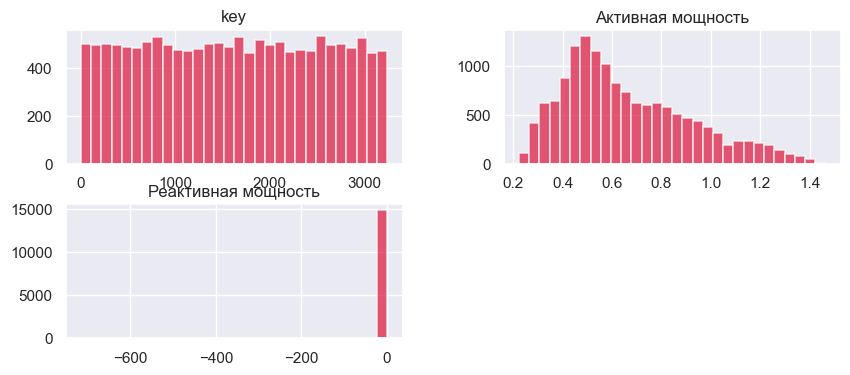

In [6]:
sns.set(style="darkgrid")

display_dataset_info(arc, df_name[0], (10, 4), 'crimson')

Построим диаграммы размаха, чтобы проанализировать выбросы 

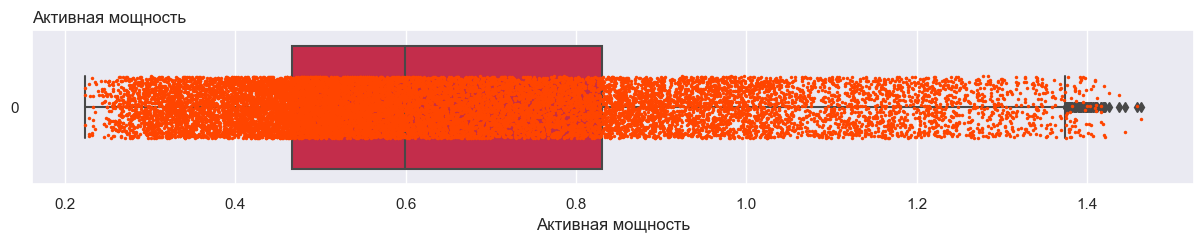

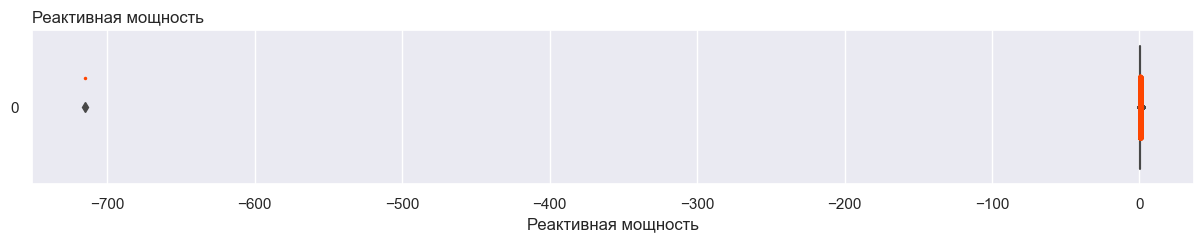

In [7]:
plot_box_strip(arc, arc.columns[-2:], 'crimson')

- Датасет содержит 5 столбцов по 14876 строк каждый
- Данне взяты за период с начала мая по начало сентября 2019 года (за 5 месяцев эксплуатации)
- Формат данных соответствует содержимому и подходит для дальнейшего анализа (изменения не требуются)
- Пропуски в датасете отстутствуют 
- В столбце `Реактивная мощность` находится аномалия - экстремально низкое значение -715.479924, что видно на гистограмме(на графике одно выбивающееся значение, которое перекрывает остальные данные) и из описательной статистики и на диаграмме размаха. Возможная причина - сбой датчиков. Строку с аномальным значением можно попытаться восстановить, но, поскольку это одно значение, просто удалим аномалию.  
- Распределение столбца `Активная мощность` похоже на распределение Пуассона со сдвигом пика влево и пологим спуском в сторону роста значений мощности (справа). Есть небольшое колличество даннх, которые на диаграмме размаха отмечаются как вбросы (за пределами "усов"), но, возможно ни связаны со спецификой производства (например, при производстве конкретной партии могло потребоваться больше манипуляций, чтобы получить нужный состав).  
- Столбец `key` содержит номер партии. Судя по гистограмме, количество строк по каждой партии приблизительно на одном уровне. 
- Столбцы `Начало нагрева дугой` и `Конец нагрева дугой` содержат дату и время начала и конца операции нагрева. 
_________________________________________________________________________________________________________________________


#### Исследуем данные о подаче сыпучих материалов (объём)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ Данные о подаче сыпучих материалов (объём) ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


'Общая информация о датасете'

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
3124,3237,NaN,NaN,170.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,252.0,NaN,130.0,206.0
3125,3238,NaN,NaN,126.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,254.0,NaN,108.0,106.0
3126,3239,NaN,NaN,NaN,NaN,NaN,114.0,NaN,NaN,NaN,NaN,NaN,158.0,NaN,270.0,88.0
3127,3240,NaN,NaN,NaN,NaN,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192.0,54.0
3128,3241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.0,52.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


None

'Определим процент пропусков в датасете:'

key          0.0
Bulk 1      91.9
Bulk 2      99.3
Bulk 3      58.5
Bulk 4      67.6
Bulk 5      97.5
Bulk 6      81.6
Bulk 7      99.2
Bulk 8     100.0
Bulk 9      99.4
Bulk 10     94.4
Bulk 11     94.3
Bulk 12     21.7
Bulk 13     99.4
Bulk 14     10.3
Bulk 15     28.2
dtype: float64

'Выведем описательную статистику и гистограммы числовых столбцов'

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
count,3129.000000,252.000000,22.000000,1298.000000,1014.000000,77.000000,576.000000,25.000000,1.0,19.000000,176.000000,177.000000,2450.000000,18.000000,2806.000000,2248.000000
mean,1624.383509,39.242063,253.045455,113.879045,104.394477,107.025974,118.925347,305.600000,49.0,76.315789,83.284091,76.819209,260.471020,181.111111,170.284747,160.513345
std,933.337642,18.277654,21.180578,75.483494,48.184126,81.790646,72.057776,191.022904,NaN,21.720581,26.060347,59.655365,120.649269,46.088009,65.868652,51.765319
min,1.000000,10.000000,228.000000,6.000000,12.000000,11.000000,17.000000,47.000000,49.0,63.000000,24.000000,8.000000,53.000000,151.000000,16.000000,1.000000
25%,816.000000,27.000000,242.000000,58.000000,72.000000,70.000000,69.750000,155.000000,49.0,66.000000,64.000000,25.000000,204.000000,153.250000,119.000000,105.000000
50%,1622.000000,31.000000,251.500000,97.500000,102.000000,86.000000,100.000000,298.000000,49.0,68.000000,86.500000,64.000000,208.000000,155.500000,151.000000,160.000000
75%,2431.000000,46.000000,257.750000,152.000000,133.000000,132.000000,157.000000,406.000000,49.0,70.500000,102.000000,106.000000,316.000000,203.500000,205.750000,205.000000
max,3241.000000,185.000000,325.000000,454.000000,281.000000,603.000000,503.000000,772.000000,49.0,147.000000,159.000000,313.000000,1849.000000,305.000000,636.000000,405.000000


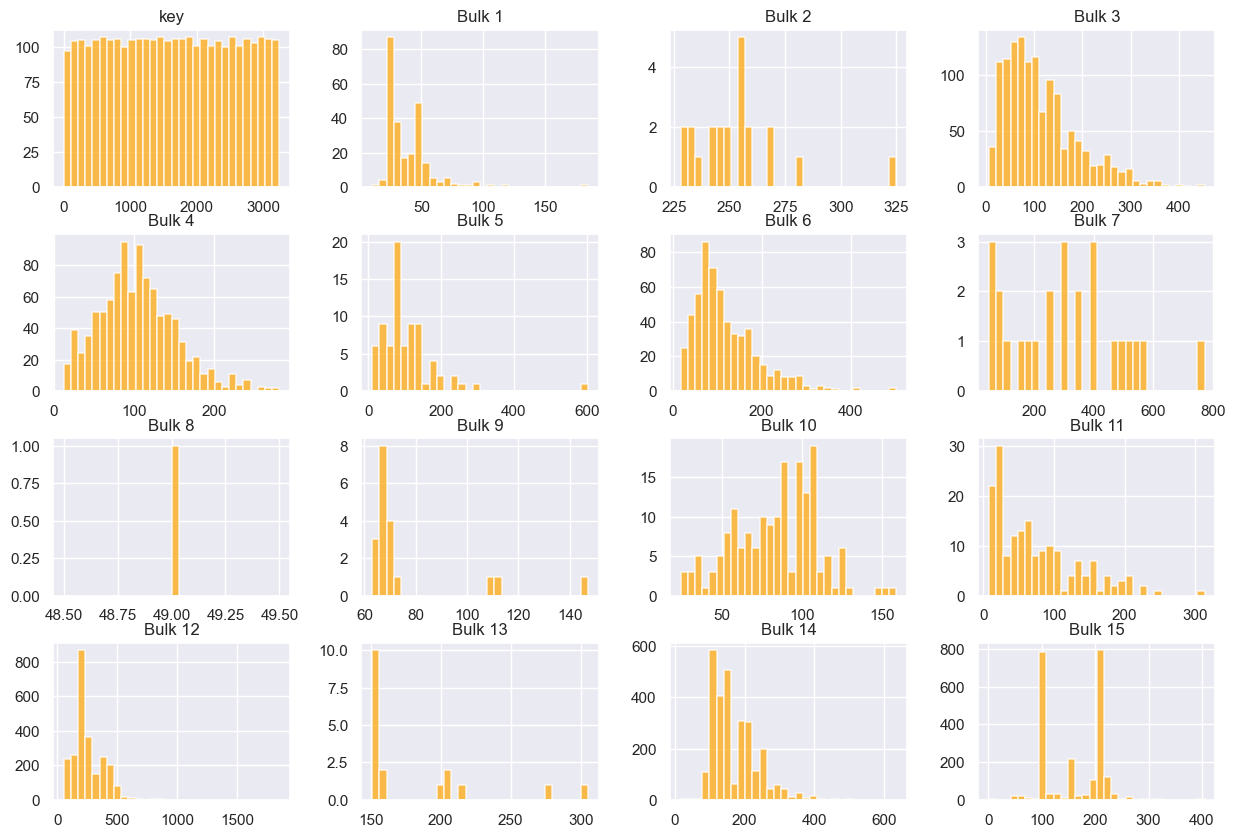

In [8]:
display_dataset_info(bulk, df_name[1], (15, 10), 'orange')

Построим диаграммы размаха для столбцов с наименьшим количеством пропусков, чтобы проверить выбросы 

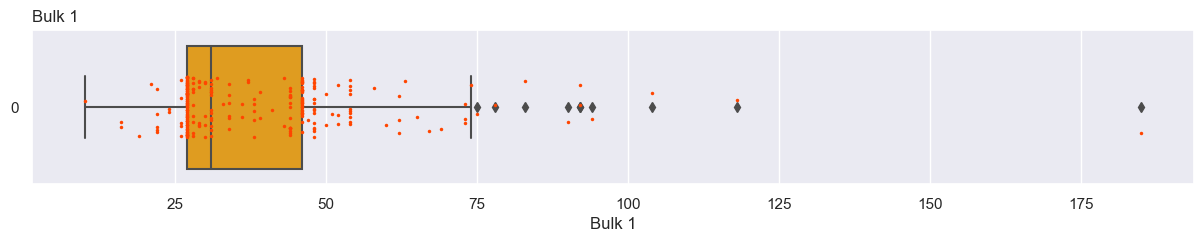

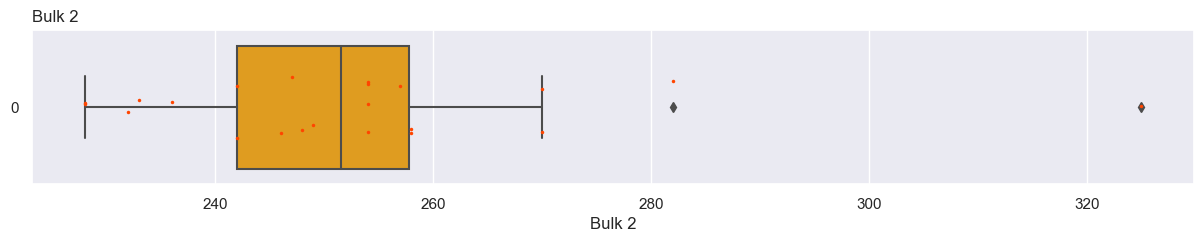

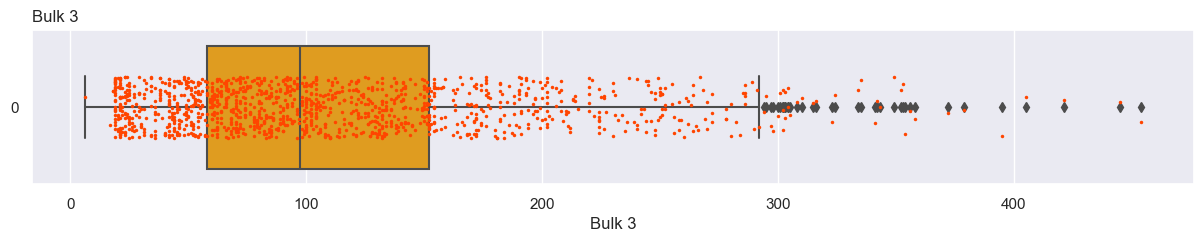

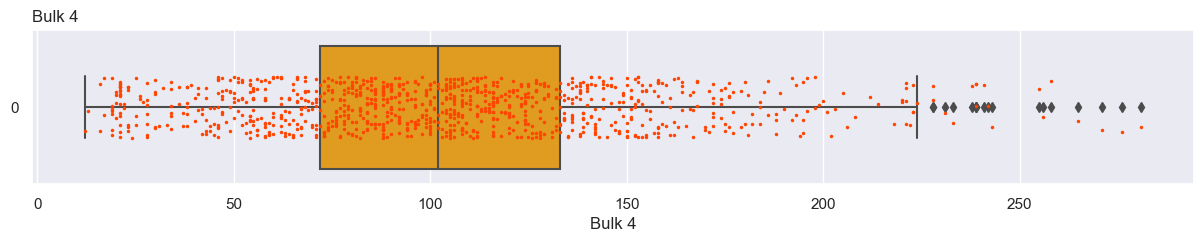

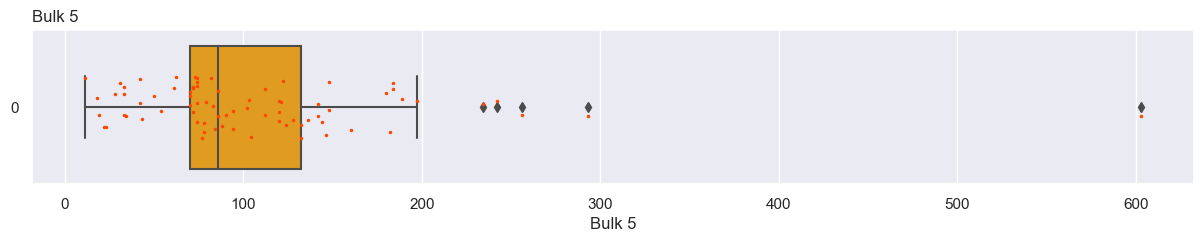

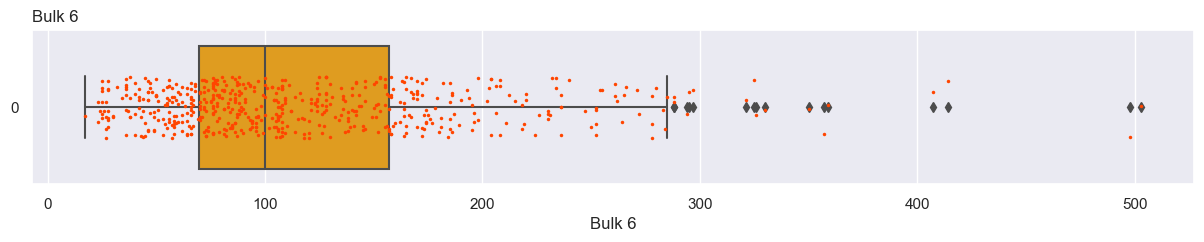

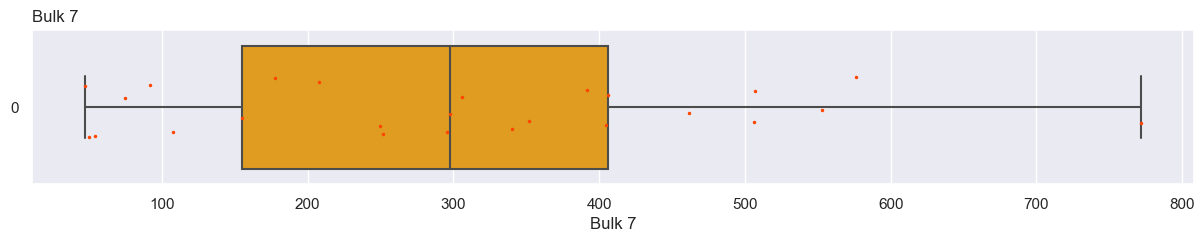

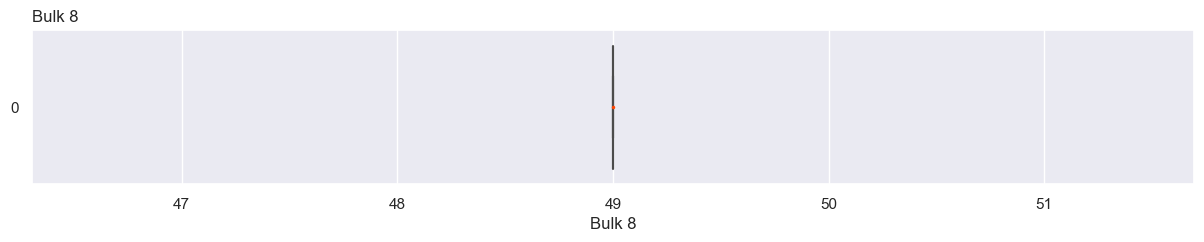

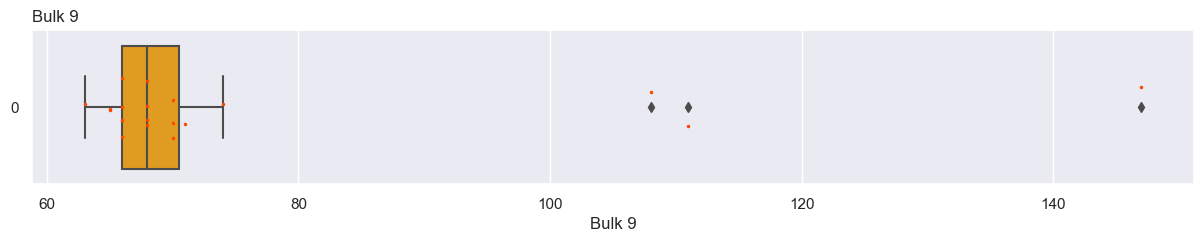

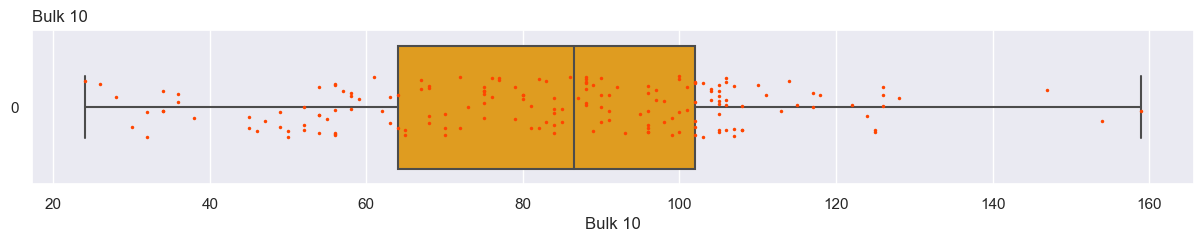

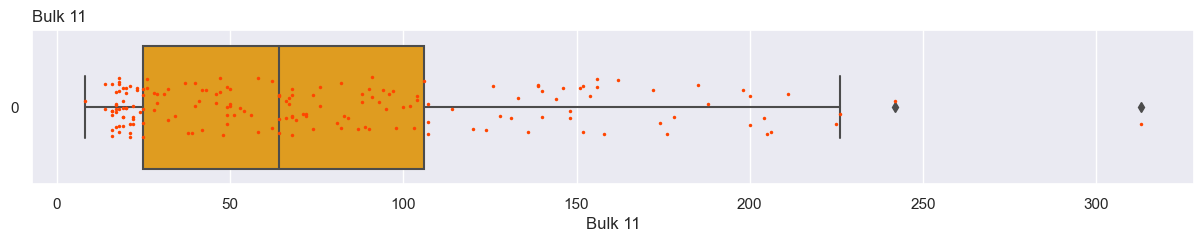

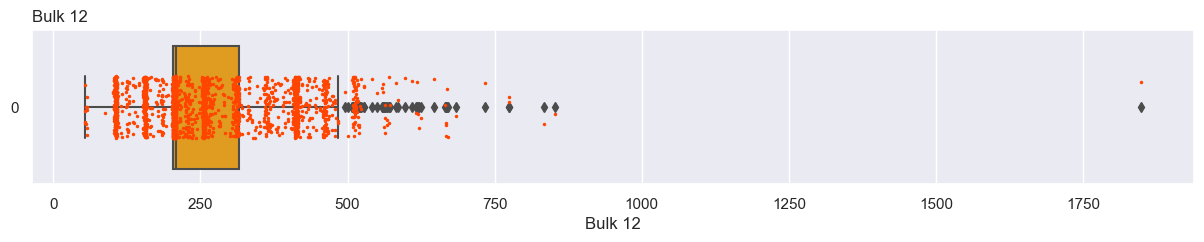

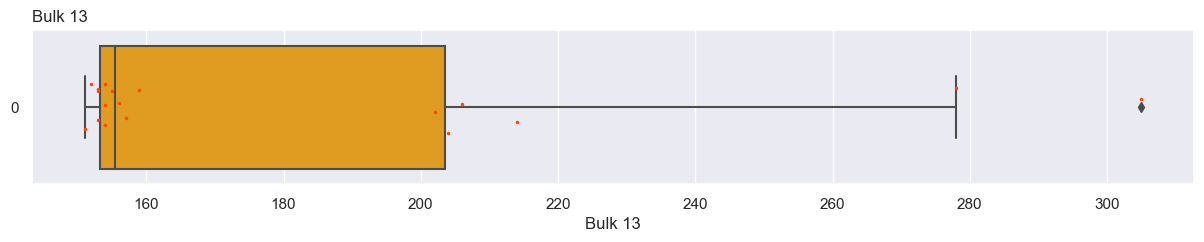

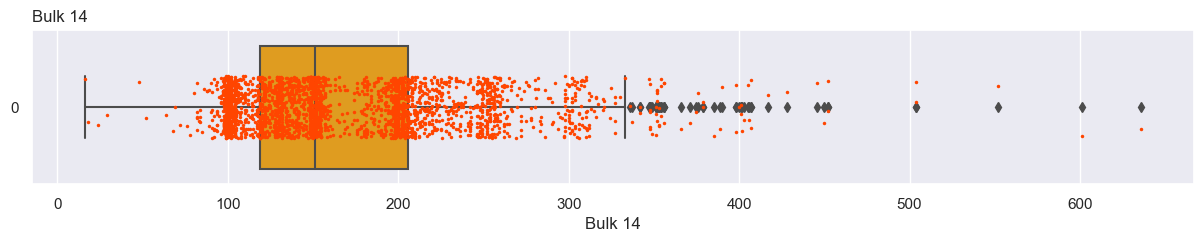

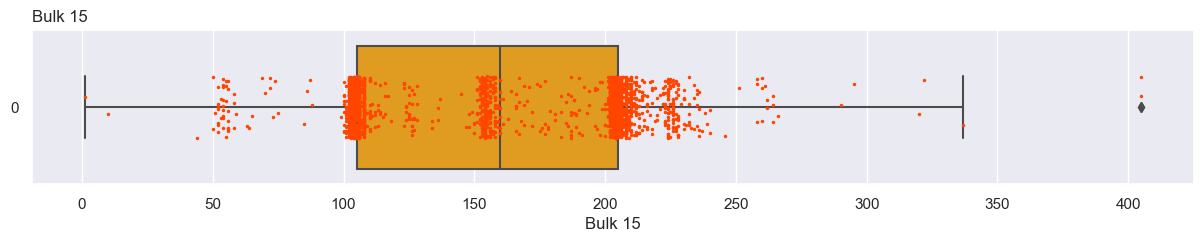

In [9]:
plot_box_strip(bulk, bulk.columns[1:], 'orange')

Диаграммы размаха подтверждают наличие большого количества выбросов в столбцах `Bulk 12`, `Bulk 14` и незначительное количество выбросов в столбце  `Bulk 15`.

- Датасет содержит 16 столбцов по 3129 строк каждый. Каждый столбец представялет отдельнй компонент, который может быть добавленв сплав в процессе производства стали. 
- Большая часть датасета содержит пропуски в количестве 58-100%, что визуально отображено на диаграммах размаха (с помощью точек). Это обьясняется тем, что бОльшая часть компонентов применяется довоьно редко. Нельзя удалить эти столбцы, поскольку в реальном производстве эти материалы пристутствуют. Заменим пропуски нулями. 
- Столбцы с наименьшим количеством пропусков -  `Bulk 12`, `Bulk 14`, `Bulk 15`. Эти материалы используются наиболее часто на производстве. Материал, указаннй в толбце `Bulk 8` использовался только в одной партии, и его масса и обьем минимальны. 
- Гистограммы числовых столбцов и описательная статистика показвают наличие выбросов в столбцах. Вероятнее всего это не имеет отношения к сбою датчиков, а связано с производством конкретной партии.  
- Столбец `key` содержит номер партии. Судя по гистограмме, количество строк по каждой партии приблизительно на одном уровне.
_________________________________________________________________________________________________________________________

####  Исследуем данные о подаче сыпучих материалов (время)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ Данные о подаче сыпучих материалов (время) ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


'Общая информация о датасете'

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,2019-05-03 11:28:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:24:31,NaN,2019-05-03 11:14:50,2019-05-03 11:10:43
1,2,NaN,NaN,NaN,2019-05-03 11:36:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:53:30,NaN,2019-05-03 11:48:37,2019-05-03 11:44:39
2,3,NaN,NaN,NaN,2019-05-03 12:32:39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:27:13,NaN,2019-05-03 12:21:01,2019-05-03 12:16:16
3,4,NaN,NaN,NaN,2019-05-03 12:43:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:58:00,NaN,2019-05-03 12:51:11,2019-05-03 12:46:36
4,5,NaN,NaN,NaN,2019-05-03 13:30:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:30:47,NaN,2019-05-03 13:34:12,2019-05-03 13:30:47


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
3124,3237,NaN,NaN,2019-09-06 11:54:15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-09-06 11:49:45,NaN,2019-09-06 11:45:22,2019-09-06 11:40:06
3125,3238,NaN,NaN,2019-09-06 12:26:52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-09-06 12:18:35,NaN,2019-09-06 12:31:49,2019-09-06 12:26:52
3126,3239,NaN,NaN,NaN,NaN,NaN,2019-09-06 15:06:00,NaN,NaN,NaN,NaN,NaN,2019-09-06 15:01:44,NaN,2019-09-06 14:58:15,2019-09-06 14:48:06
3127,3240,NaN,NaN,NaN,NaN,NaN,2019-09-06 16:24:28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-09-06 16:07:29,2019-09-06 16:01:34
3128,3241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-09-06 17:26:33,2019-09-06 17:23:15


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   Bulk 1   252 non-null    object
 2   Bulk 2   22 non-null     object
 3   Bulk 3   1298 non-null   object
 4   Bulk 4   1014 non-null   object
 5   Bulk 5   77 non-null     object
 6   Bulk 6   576 non-null    object
 7   Bulk 7   25 non-null     object
 8   Bulk 8   1 non-null      object
 9   Bulk 9   19 non-null     object
 10  Bulk 10  176 non-null    object
 11  Bulk 11  177 non-null    object
 12  Bulk 12  2450 non-null   object
 13  Bulk 13  18 non-null     object
 14  Bulk 14  2806 non-null   object
 15  Bulk 15  2248 non-null   object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB


None

'Определим процент пропусков в датасете:'

key          0.0
Bulk 1      91.9
Bulk 2      99.3
Bulk 3      58.5
Bulk 4      67.6
Bulk 5      97.5
Bulk 6      81.6
Bulk 7      99.2
Bulk 8     100.0
Bulk 9      99.4
Bulk 10     94.4
Bulk 11     94.3
Bulk 12     21.7
Bulk 13     99.4
Bulk 14     10.3
Bulk 15     28.2
dtype: float64

'Выведем описательную статистику и гистограммы числовых столбцов'

,key
count,3129.000000
mean,1624.383509
std,933.337642
min,1.000000
25%,816.000000
50%,1622.000000
75%,2431.000000
max,3241.000000


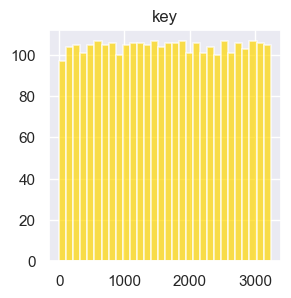

In [10]:
display_dataset_info(bulk_time, df_name[2], (3, 3), 'gold')

- **Датасеты, содержащие данные о подаче сыпучих материалов - объём и время - имеют одинаковое количество пропусков в одних и тех же столбцах.**  
- Датасет содержит 16 столбцов по 3129 строк каждый. Каждый столбец представялет отдельнй компонент, который может быть добавлен в сплав в процессе производства стали.
- Большая часть датасета содержит пропуски в количестве 58-100%, что визуально отображено на диаграммах размаха (с помощью точек). Это обьясняется тем, что бОльшая часть компонентов применяется довоьно редко. Нельзя удалить эти столбцы, поскольку в реальном производстве эти материалы пристутствуют. Заменим пропуски нулями.
- Столбцы с наименьшим количеством пропусков - Bulk 12, Bulk 14, Bulk 15. Эти материалы используются наиболее часто на производстве.
- Гистограммы числовых столбцов и описательная статистика показвают наличие выбросов в столбцах. Вероятнее всего это не имеет отношения к сбою датчиков, а связано с производством конкретной партии.
- Столбец key содержит номер партии. Судя по гистограмме, количество строк по каждой партии приблизительно на одном уровне.
_____________________________________________________________________________________________________________________________

####  Исследуем данные о продувке сплава газом

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ Данные о продувке сплава газом ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


'Общая информация о датасете'

,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692


,key,Газ 1
3234,3237,5.543905
3235,3238,6.745669
3236,3239,16.023518
3237,3240,11.863103
3238,3241,12.680959


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


None

'Определим процент пропусков в датасете:'

key      0.0
Газ 1    0.0
dtype: float64

'Выведем описательную статистику и гистограммы числовых столбцов'

,key,Газ 1
count,3239.000000,3239.000000
mean,1621.861377,11.002062
std,935.386334,6.220327
min,1.000000,0.008399
25%,812.500000,7.043089
50%,1622.000000,9.836267
75%,2431.500000,13.769915
max,3241.000000,77.995040


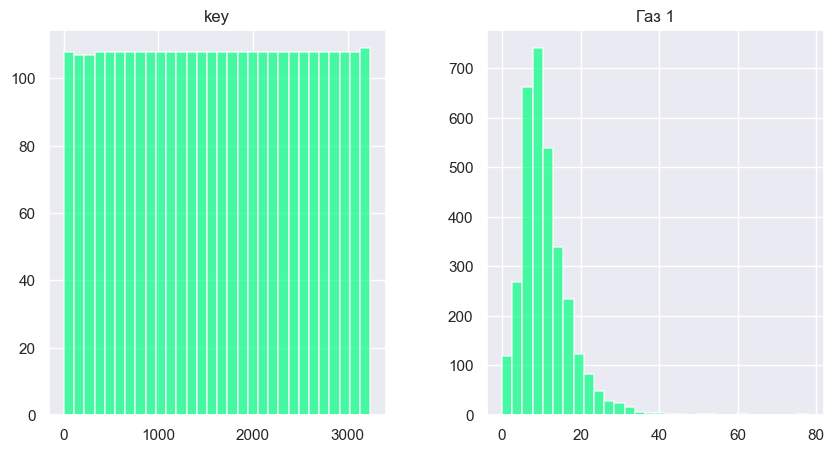

In [11]:
display_dataset_info(gas, df_name[3], (10, 5), 'springgreen')

Построим диаграмму размаха для столбца `Газ 1`

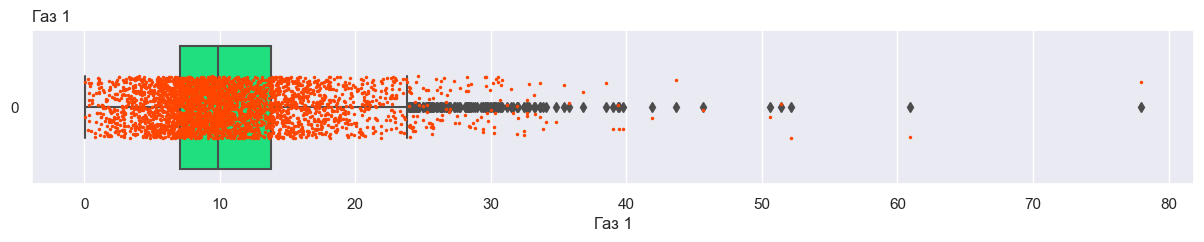

In [12]:
plot_box_strip(gas, gas.columns[1:], 'springgreen')

В размах «усов» диаграммы размаха столбца попадают нормальные значения, а за пределами находятся выбросы, изображённые точками.

- Датасет содержит 2 столбца по 3239 строк каждый.
- Пропуски отсутствуют
- Столбец `Газ 1` содержит небольшое количесвто выбросов, что подтверждает диаграмма размаха (вразмах «усов» диаграммы размаха столбца попадают нормальные значения, а за пределами находятся выбросы, изображённые точками) и гистограмма. Наиболее вероятно, что выбросы связаны с производством ккаких-то партий, где возникли сложности. 
- Столбец `key` содержит номер партии. Судя по гистограмме, количество строк по каждой партии приблизительно на одном уровне.
______________________________________________________________________________________________________________________________

#### Исследуем результаты измерения температуры

Таблица, содержащая целевой признак(последняя температура). То есть нам важно в дальнейшем прогнозировать конечную температуру нагрева.

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ Результаты измерения температуры ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


'Общая информация о датасете'

,key,Время замера,Температура
0,1,2019-05-03 11:02:04,1571.0
1,1,2019-05-03 11:07:18,1604.0
2,1,2019-05-03 11:11:34,1618.0
3,1,2019-05-03 11:18:04,1601.0
4,1,2019-05-03 11:25:59,1606.0


,key,Время замера,Температура
18087,3241,2019-09-06 16:55:01,NaN
18088,3241,2019-09-06 17:06:38,NaN
18089,3241,2019-09-06 17:21:48,NaN
18090,3241,2019-09-06 17:24:44,NaN
18091,3241,2019-09-06 17:30:05,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18092 entries, 0 to 18091
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           18092 non-null  int64  
 1   Время замера  18092 non-null  object 
 2   Температура   14665 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 424.2+ KB


None

'Определим процент пропусков в датасете:'

key              0.0
Время замера     0.0
Температура     18.9
dtype: float64

'Выведем описательную статистику и гистограммы числовых столбцов'

,key,Температура
count,18092.000000,14665.000000
mean,1616.460977,1590.722741
std,934.641385,20.394381
min,1.000000,1191.000000
25%,807.750000,1580.000000
50%,1618.000000,1590.000000
75%,2429.000000,1599.000000
max,3241.000000,1705.000000


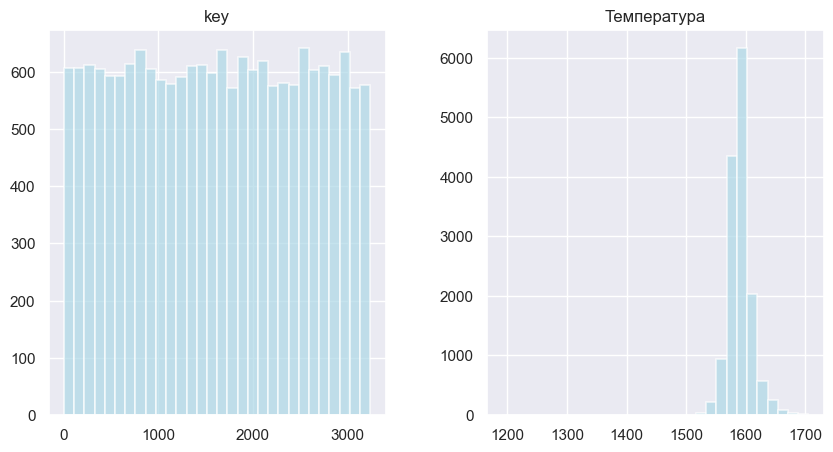

In [13]:
display_dataset_info(temp, df_name[4], (10, 5), 'lightblue')

Построим диаграмму размаха для столбца `Температура`

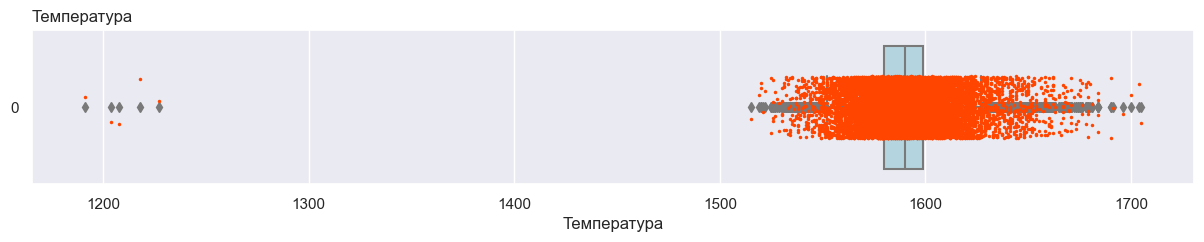

In [14]:
plot_box_strip(temp, temp.columns[2:], 'lightblue')

В размах «усов» диаграммы размаха столбца попадают нормальные значения, а за пределами находятся выбросы, изображённые точками.   
 **По информации от заказчика температура плавления нашего металла 1500 градусов, все что ниже - аномалии**.

- Датасет содержит 3 столбца по 18092 строк
- Пропуски отсутствуют
- В столбце `Температура` небольшое количесвто выбросов, что подтверждает диаграмма размаха (вразмах «усов» диаграммы попадают нормальные значения, а за пределами находятся выбросы, изображённые точками) и гистограмма. По информации от заказчика температура плавления нашего металла 1500 градусов, все что ниже - аномалии, которые необходимо удалить. 
- Столбец key содержит номер партии. Судя по гистограмме, количество строк по каждой партии приблизительно на одном уровне.
______________________________________________________________________________________________________________________________

#### Исследуем данные о проволочных материалах (объём)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ Данные о проволочных материалах (объём) ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


'Общая информация о датасете'

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
3076,3237,38.088959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3077,3238,56.128799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3078,3239,143.357761,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3079,3240,34.070400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3080,3241,63.117595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


None

'Определим процент пропусков в датасете:'

key         0.0
Wire 1      0.8
Wire 2     65.0
Wire 3     98.0
Wire 4     99.5
Wire 5    100.0
Wire 6     97.6
Wire 7     99.6
Wire 8     99.4
Wire 9     99.1
dtype: float64

'Выведем описательную статистику и гистограммы числовых столбцов'

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
count,3081.000000,3055.000000,1079.000000,63.000000,14.000000,1.000,73.000000,11.000000,19.000000,29.000000
mean,1623.426485,100.895853,50.577323,189.482681,57.442841,15.132,48.016974,10.039007,53.625193,34.155752
std,932.996726,42.012518,39.320216,99.513444,28.824667,NaN,33.919845,8.610584,16.881728,19.931616
min,1.000000,1.918800,0.030160,0.144144,24.148801,15.132,0.034320,0.234208,45.076721,4.622800
25%,823.000000,72.115684,20.193680,95.135044,40.807002,15.132,25.053600,6.762756,46.094879,22.058401
50%,1619.000000,100.158234,40.142956,235.194977,45.234282,15.132,42.076324,9.017009,46.279999,30.066399
75%,2434.000000,126.060483,70.227558,276.252014,76.124619,15.132,64.212723,11.886057,48.089603,43.862003
max,3241.000000,330.314424,282.780152,385.008668,113.231044,15.132,180.454575,32.847674,102.762401,90.053604


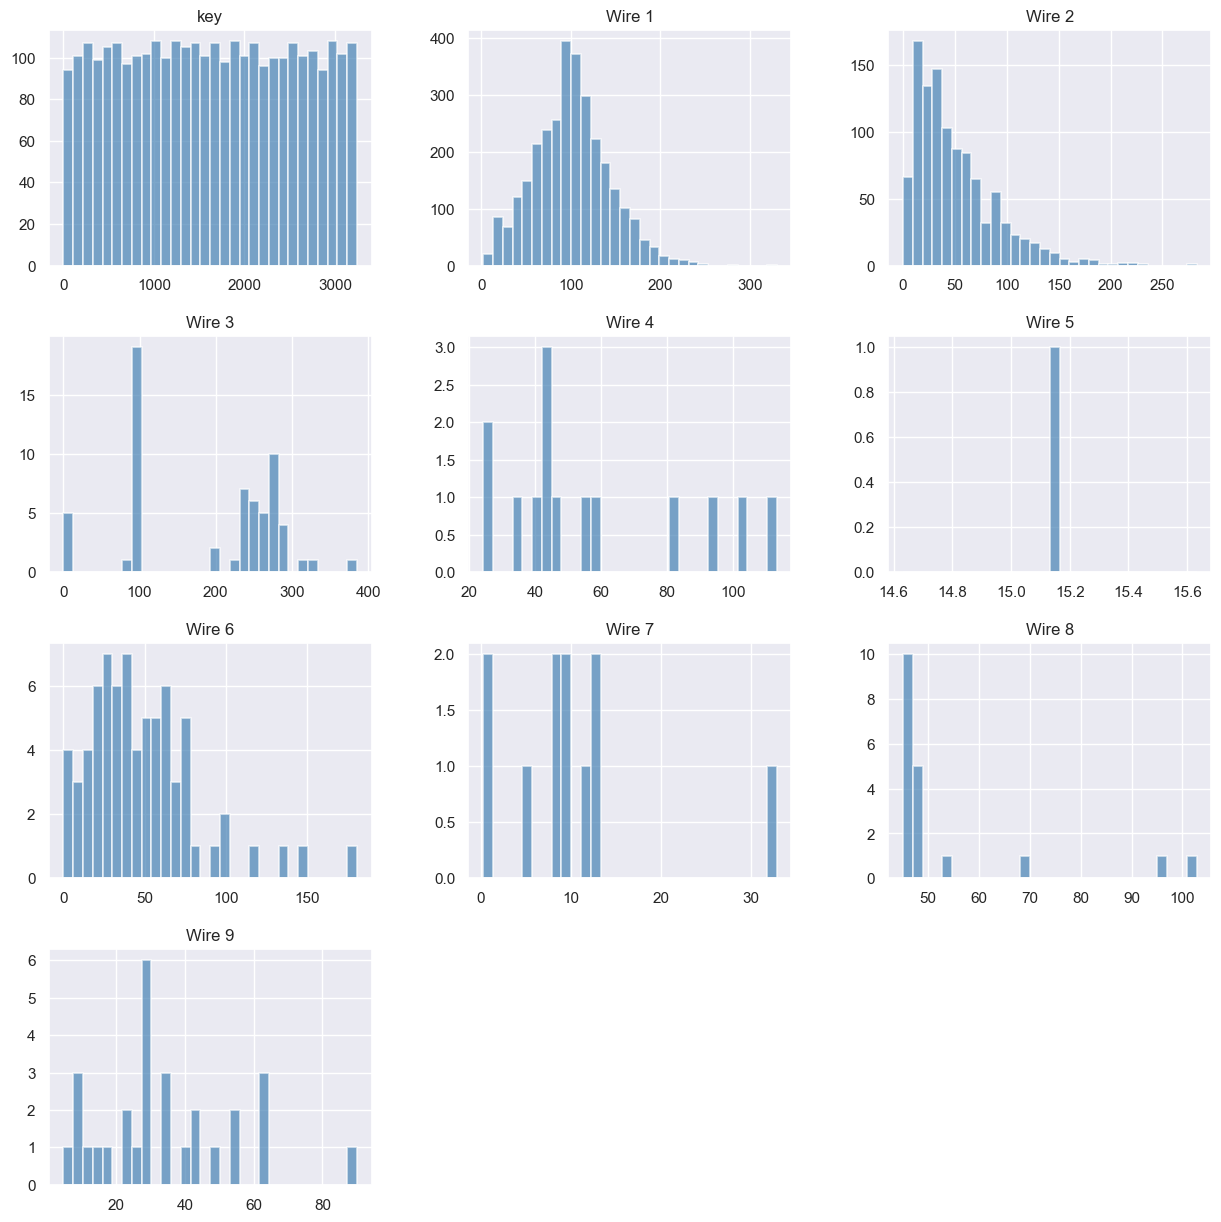

In [15]:
display_dataset_info(wire, df_name[5], (15, 15), 'steelblue')

Построим диаграммы размаха для столбцов с наименьшим колличеством пропусков -  `Wire 1` и `Wire 2`.

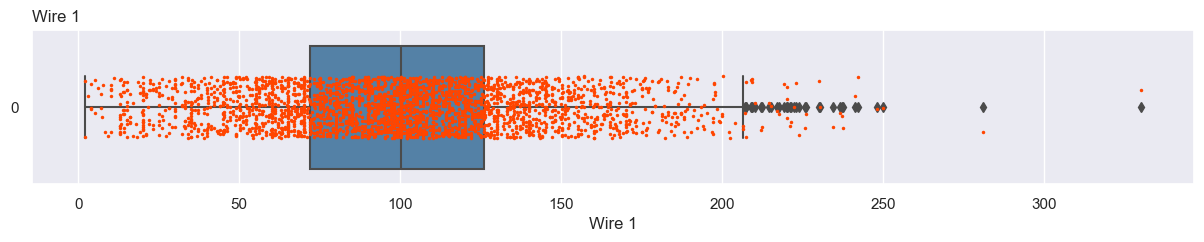

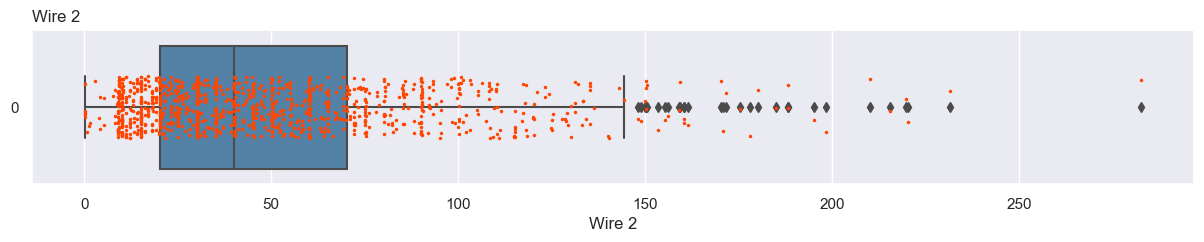

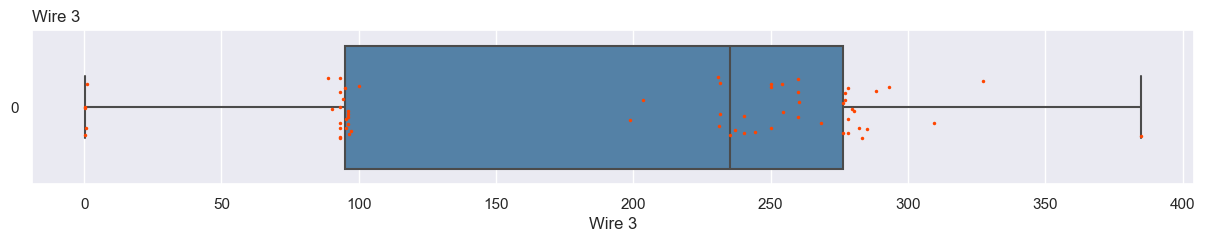

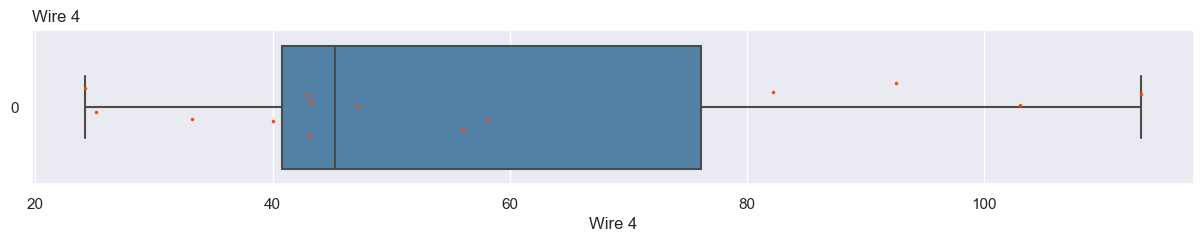

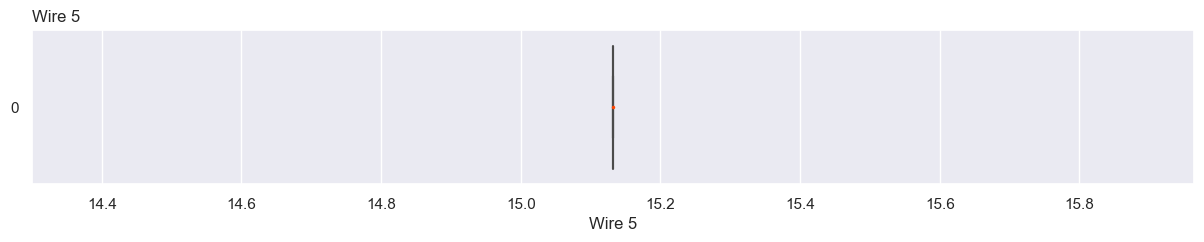

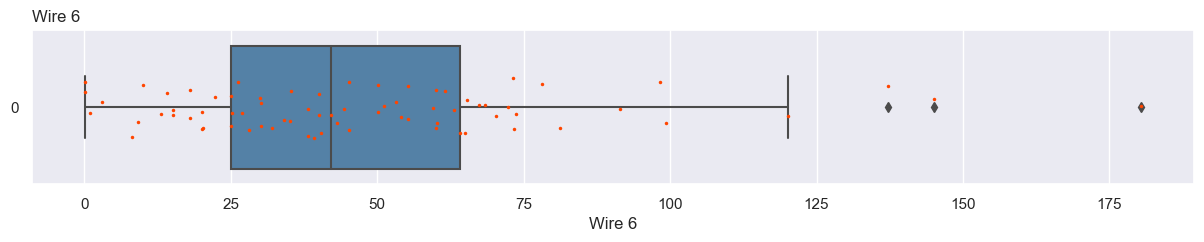

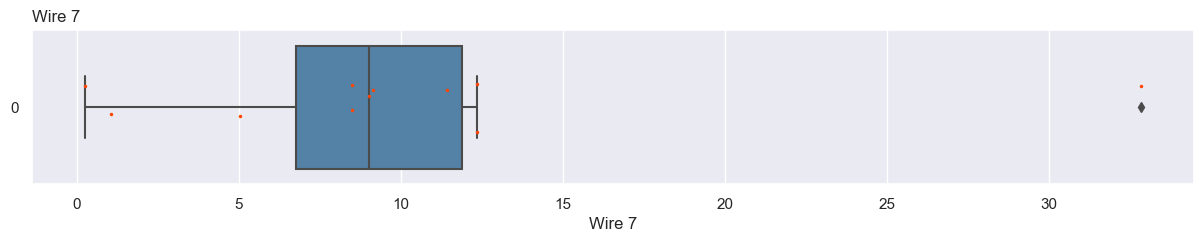

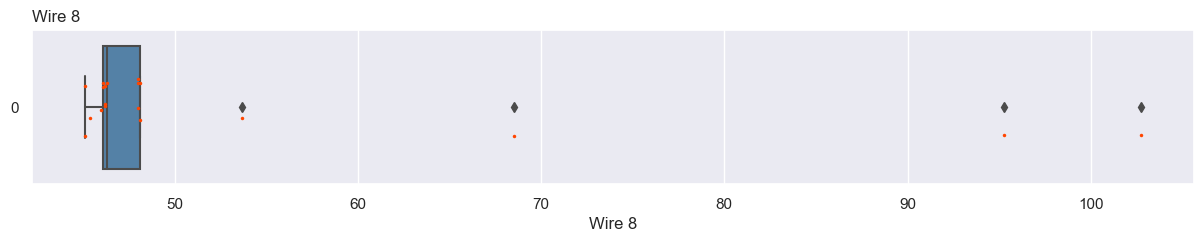

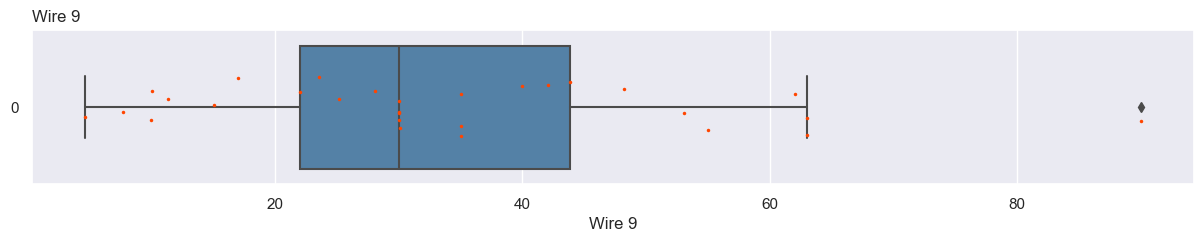

In [16]:
plot_box_strip(wire, wire.columns[1:], 'steelblue')

- Датасет содержит 10 столбцов по 3081 строк каждый.
- Большая часть датасета содержит пропуски 97-100%, которые необходимо зменить нулями. В столбцах с пропусками представлены материал, которе применяются редко при производстве. 
- Столбцы с наименьшим количеством пропусков -  `Wire 1` (0.8% пропусков) и  `Wire 2` (65% пропусков) - представляют материалы, которые наиолее часто вводят в состав сплава. Столбей `Wire 5` содержит материал, который практически не использовался в процессе производства. 
- Диаграммы размаха, гистограммы и статистика подтверждают наличие выбросов в столбцах. что может быть связано с особенностями вплавки конкретных партий стали.  
- Столбец `key` содержит номер партии. Судя по гистограмме, количество строк по каждой партии приблизительно на одном уровне.
_____________________________________________________________________________________________________________________________

#### Исследуем данные о проволочных материалах (время)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ Данные о проволочных материалах (время) ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


'Общая информация о датасете'

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:06:19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:36:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:11:46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019-05-03 12:43:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019-05-03 13:20:44,2019-05-03 13:15:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
3076,3237,2019-09-06 11:33:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3077,3238,2019-09-06 12:18:35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3078,3239,2019-09-06 14:36:11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3079,3240,2019-09-06 15:33:55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3080,3241,2019-09-06 17:10:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3081 non-null   int64 
 1   Wire 1  3055 non-null   object
 2   Wire 2  1079 non-null   object
 3   Wire 3  63 non-null     object
 4   Wire 4  14 non-null     object
 5   Wire 5  1 non-null      object
 6   Wire 6  73 non-null     object
 7   Wire 7  11 non-null     object
 8   Wire 8  19 non-null     object
 9   Wire 9  29 non-null     object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB


None

'Определим процент пропусков в датасете:'

key         0.0
Wire 1      0.8
Wire 2     65.0
Wire 3     98.0
Wire 4     99.5
Wire 5    100.0
Wire 6     97.6
Wire 7     99.6
Wire 8     99.4
Wire 9     99.1
dtype: float64

'Выведем описательную статистику и гистограммы числовых столбцов'

,key
count,3081.000000
mean,1623.426485
std,932.996726
min,1.000000
25%,823.000000
50%,1619.000000
75%,2434.000000
max,3241.000000


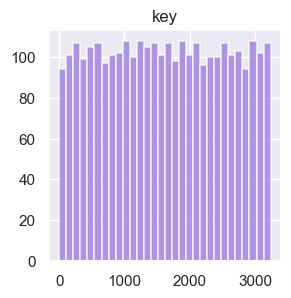

In [17]:
display_dataset_info(wire_time, df_name[6], (3, 3), 'mediumpurple')

- **Датасеты, содержащие данные о проволочных материалах - объём и время - имеют одинаковое количество пропусков в одних и тех же столбцах.** 
- Датасет содержит 10 столбцов по 3081 строк каждый.
- Большая часть датасета содержит пропуски 97-100%, которые необходимо зменить нулями. В столбцах с пропусками представлены материал, которе применяются редко при производстве. Пропуски встречаются там, где материал не вносился в сплав партии. 
- Столбцы с наименьшим количеством пропусков -  `Wire 1` (0.8% пропусков) и  `Wire 2` (65% пропусков) - представляют материалы, которые наиолее часто вводят в состав сплава.
- Диаграммы размаха, гистограммы и статистика подтверждают наличие выбросов в столбцах. что может быть связано с особенностями вплавки конкретных партий стали.  
- Столбец `key` содержит номер партии. Судя по гистограмме, количество строк по каждой партии приблизительно на одном уровне.
_____________________________________________________________________________________________________________________________

_____________________________________________________________________________________________________________________________
**ВЫВОДЫ:** <a id='исследовательский_анализ'></a>

**Изучена общая информаци в файлах проекта** 

- В ходе  исследовательского анализа данных были рассмотрены 7 датасетов, содержащих информацию за период с мая по сентябрь 2019 года (пять месяцев эксплуатации). 
- В процессе анализа выявлены две аномалии, предположительно связанные с неисправностями датчиков, которые требуется удалить:
  - Первая аномалия обнаружена в столбце "Реактивная мощность" датасета, содержащего данные об электродах. Обнаружено экстремально низкое (отрицательное) значение реактивной мощности в размере -715.479924.
  - В датасете, представляющем результаты измерений температуры (целевой датасет), также были обнаружены несколько значений ниже 1500 градусов. Согласно информации от заказчика, значения ниже этой температуры плавления металла являются аномалией.
- Каждый датасет содержит столбец "key" (номер партии), который будет использоваться для последующего объединения в финальной таблице. Из гистограммы видно, что количество строк для каждой партии примерно одинаково.
- Датасеты, содержащие информацию о подаче сыпучих материалов (объем и время), имеют одинаковое количество пропусков (от 58% до 100%) в одних и тех же столбцах. В остальных столбцах количество пропусков значительно ниже. Каждый столбец представляет отдельный компонент, который может быть добавлен в сплав в процессе производства стали. Из-за этого невозможно удалить эти столбцы, поскольку эти материалы действительно присутствуют в реальном производстве. Для решения данной проблемы пропуски будем заменять нулевыми значениями.
- Датасеты, содержащие информацию о проволочных материалах (объем и время), также имеют одинаковое количество пропусков (от 97% до 100%) в одних и тех же столбцах. Большая часть датасетов содержит пропуски в объеме от 97% до 100%, которые будем заменять нулевыми значениями. В остальных столбцах количество пропусков значительно ниже. Пропуски в столбцах соответствуют материалам, которые редко применяются в производстве, и их отсутствие указывает на то, что эти материалы не добавлялись в сплав партии.
- Анализ диаграмм размаха, гистограмм и статистических показателей подтвердил наличие выбросов в различных столбцах, что может быть связано с особенностями вплавки конкретных партий стали. Более детально рассмотрим их на этапе предобрадотки данных. 
- Три датасета, включающие данные об электродах, данные о подаче сыпучих материалов (время) и данные о проволочных материалах (время), содержат информацию о времени операции. 
_____________________________________________________________________________________________________________________________

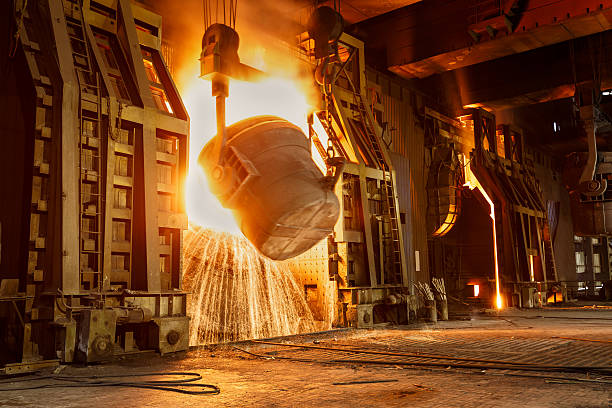